Import useful librabries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/drive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

In [ ]:
#import csv with predictions of prey and non-prey events after object detection task
pred_df = pd.read_csv("/mydrive/Thesis_Data/Object_Detection/full_spreadsheet.csv")

#import csv with predictions of prey and non-prey events after object detection task with penguin labels #uncomment line below
#pred_df = pd.read_csv("/mydrive/Thesis_Data/Object_Detection/full_spreadsheet_2.csv")
pred_df.head(10)

,filename,date,time,frame_number,prey_event,prey_type
0,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,0,0,0
1,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,1,0,0
2,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,2,0,0
3,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,3,0,0
4,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,4,0,0
5,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,5,1,1
6,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,6,1,1
7,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,7,1,1
8,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,8,1,1
9,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,2016/10/20,07:50:08,9,1,3


In [ ]:
#import csv with ground truth labels of prey and non-prey events
ground_df = pd.read_csv("/mydrive/Thesis_Data/Object_Detection/ground_truth_labels.csv")
ground_df.head(10)

,Unnamed: 0,File_Name,penguin_ID,Video_ID,Date,Time,Frame_No,Label
0,0,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,0,nonprey
1,1,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,1,nonprey
2,12,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,2,nonprey
3,23,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,3,nonprey
4,24,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,4,nonprey
5,25,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,5,nonprey
6,26,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,6,nonprey
7,27,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,7,nonprey
8,28,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,8,nonprey
9,29,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,GI-LP0238,MOVI0006,2016-10-20,07:50:08,9,nonprey


In [ ]:
ground_df['Correct_Label'] = [1 if x == "prey" else 0 for x in ground_df['Label']]

In [ ]:
vid_pred = pred_df['prey_event']
vid_true = ground_df['Correct_Label']

In [ ]:
#before penguins
accuracy_score(vid_pred, vid_true)*100

73.36595976073953

In [ ]:
confusion_matrix(vid_pred, vid_true)

array([[13463,    22],
       [ 4876,    29]])

In [ ]:
#after inclusion of penguins
accuracy_score(vid_pred, vid_true)*100

76.03045133224579

In [ ]:
confusion_matrix(vid_pred, vid_true)

array([[13973,    42],
       [ 4366,     9]])

In [ ]:
def performance_measures(y_pred, y_true):
  """
  Outputs the and specificity of a binary classification prediction model
  Inputs:
    y_pred (list) - predictions from model  
    y_true (list) - true classes of dataset
  Output:
   recall, precision (tuple) - the recall, precision of the model
  """
  confusion = confusion_matrix(y_pred, y_true)
  TP = confusion[1,1]
  FN = confusion[0,1]
  FP = confusion[1,0]

  recall = TP/(TP+FN)
  precision = TP/(TP+FP)

  return recall, precision

In [ ]:
performance_measures(vid_pred, vid_true)

(0.5686274509803921, 0.005912334352701326)

In [ ]:
performance_measures(vid_pred, vid_true)

(0.17647058823529413, 0.002057142857142857)

In [ ]:
def plot_results(start_datetime, frame_rate, true, pred, filename):
  """
  Outputs and saves line graph of the true and predicted classes of images in a clip
  Inputs:
    start_datetime (str) - the start time of video clip used
    frame_rate (int) - the number of frames per second in the video clip the 
                        images were extracted from 
    pred (list) - predicted classes of dataset  
    true (list) - true classes of dataset
    filename (str) - path to location and file name of saved plot
  Output:
   visualization 
  """

  import datetime as dt
  import matplotlib.pyplot as plt
  %matplotlib inline

  start_datetime = pd.to_datetime(start_datetime)
  date = start_datetime.date()
  start_time = start_datetime.time()

  time = start_time
  time_label = [start_time]
  delta = dt.timedelta(seconds=(1/frame_rate))

  for i in range(0, (len(pred)-1)):
    time = (dt.datetime.combine(dt.date(1,1,1),time) + delta).time()
    time_label.append(time)
  
  time = start_time
  seconds = int(round(len(pred)/(60*frame_rate),0))
  time_ticks =[start_time]

  for i in range(0, (seconds)):
    time = (dt.datetime.combine(dt.date(1,1,1),time) +  dt.timedelta(seconds=(61))).time()
    time_ticks.append(str(time))
    
  df = pd.concat([pd.DataFrame({'time':time_label}).astype('str'),  pd.DataFrame({'prediction':pred}),  pd.DataFrame({'ground_truth':true})], axis=1)

  fig, ax = plt.subplots(figsize=(20, 10))
  plt.plot(df['time'],df['prediction'], 'r', label='predictions')
  plt.plot(df['time'],df['ground_truth'], 'b', label='ground truth')
  plt.xticks(np.arange(len(pred), step=(60*frame_rate)),time_ticks, fontsize=17)
  plt.yticks(fontsize=19)
  plt.legend()
  ax.set_xlabel('Time on ' + str(date), fontsize=25)
  ax.set_ylabel('Prediction', fontsize=25)

  plt.savefig((filename+'.png'))
  plt.show()

In [ ]:
location = "/mydrive/Thesis_Data/Object_Detection/"

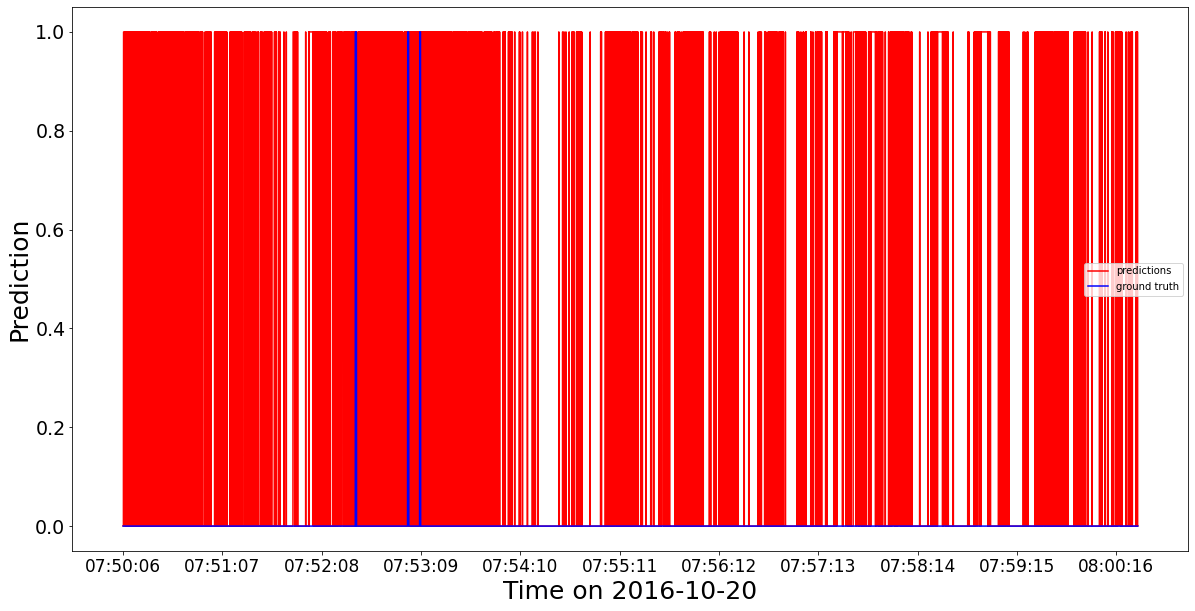

In [ ]:
plot_results('2016-10-20 07:50:06', frame_rate = 30, true = vid_true, pred = vid_pred, filename = (location+"movi6"))

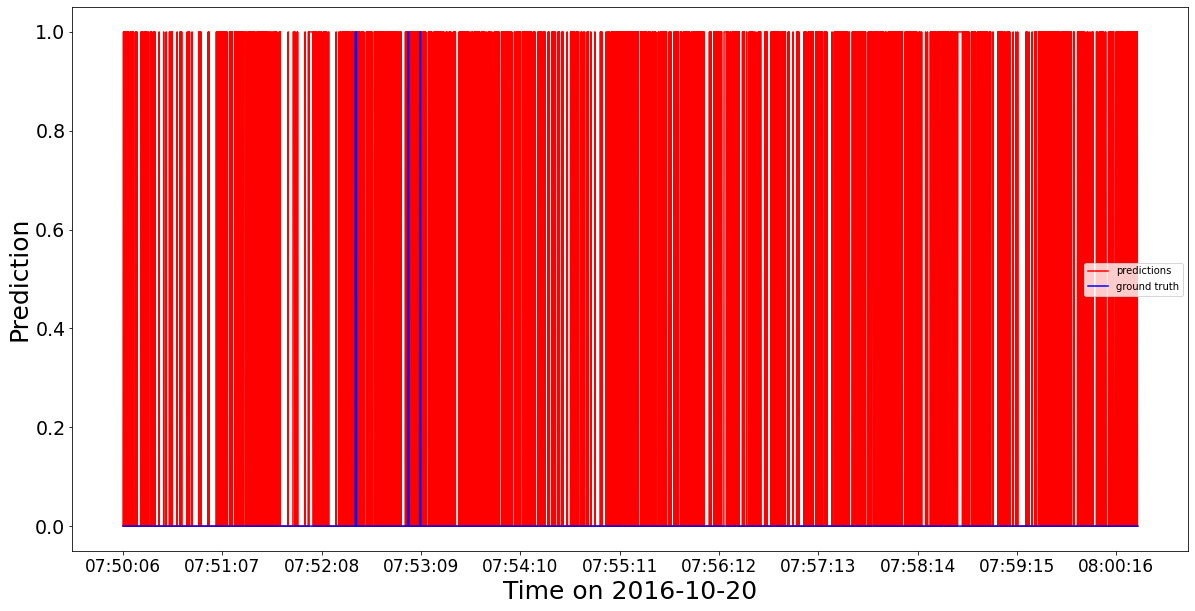

In [ ]:
plot_results('2016-10-20 07:50:06', frame_rate = 30, true = vid_true, pred = vid_pred, filename = (location+"movi6_with_penguin_2"))

# Image Classifier

In [ ]:
directory = "/mydrive/Thesis_Data/Image_Classification/"
full_df = pd.read_csv((directory+'MOVI0006_fullpredictions.csv'))

In [ ]:
pred_classes= full_df["class"].astype(int)

In [ ]:
accuracy_score(pred_classes, vid_true)*100

95.38879825992387

In [ ]:
confusion_matrix(pred_classes, vid_true)

array([[17538,    47],
       [  801,     4]])

In [ ]:
performance_measures(pred_classes, vid_true)

(0.0784313725490196, 0.004968944099378882)

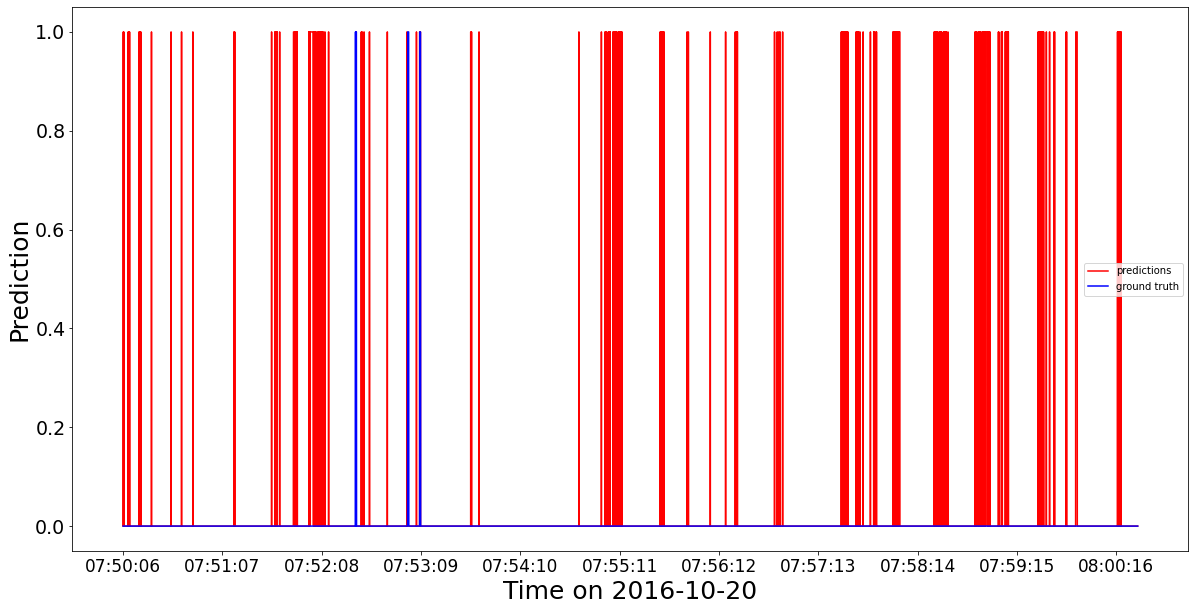

In [ ]:
plot_results('2016-10-20 07:50:06', frame_rate = 30, true = vid_true, pred = pred_classes, filename = (directory+'MOVI0006_fullpredictions_2.png'))

In [ ]:
new_pred_df = pd.read_csv("/mydrive/Thesis_Data/Object_Detection/new_predictions.csv")
new_pred_df.head()

,Unnamed: 0,File_Name,prob_0,prob_1,class,new_class
0,0,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,0.788379,0.211621,0,0
1,1,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,0.864135,0.135865,0,0
2,2,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,0.241822,0.758178,1,0
3,3,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,0.706499,0.293501,0,0
4,4,GI-LP0238_7_MOVI0006.avi_image_2016-10-20_07_5...,0.864135,0.135865,0,0


In [ ]:
vid_newpred = new_pred_df['new_class']

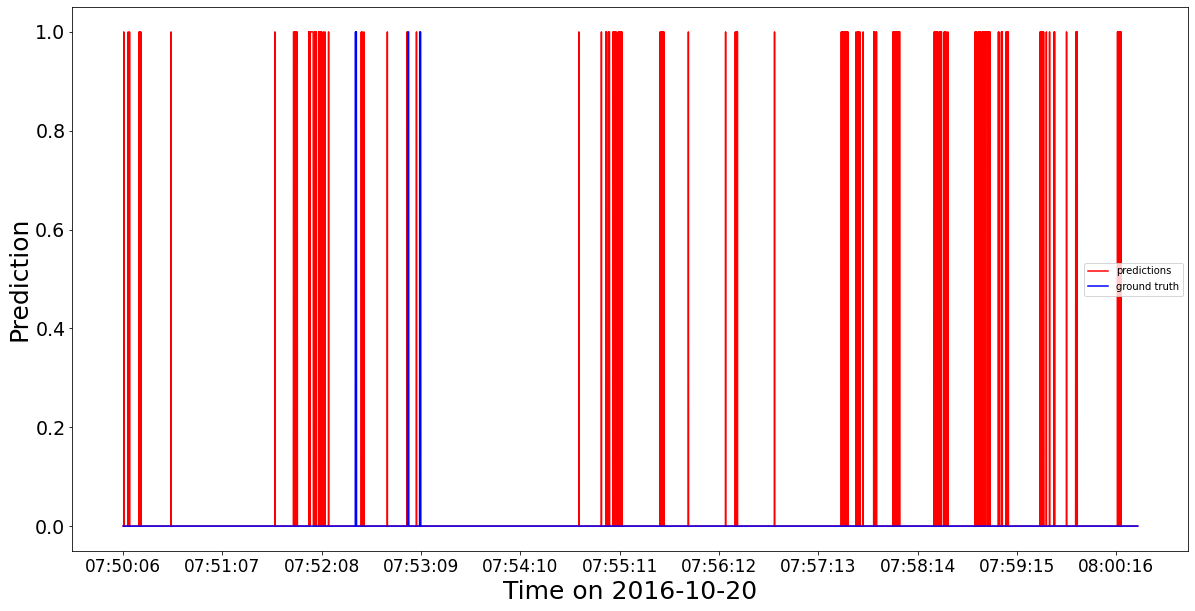

In [ ]:
plot_results('2016-10-20 07:50:06', frame_rate = 30, true = vid_true, pred = vid_newpred, filename = (location+"movi6_OD"))

In [ ]:
#after penguins
accuracy_score(vid_newpred, vid_true)*100

96.26971179989124

In [ ]:
confusion_matrix(vid_newpred, vid_true)

array([[17701,    48],
       [  638,     3]])